# Health Insurance Cross Sell Prediction

## Import Library dan Data

In [ ]:
!pip install scipy==1.11.4
!pip install dalex
!pip install scikit-plot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=c92859306467ec834424eefa73a454ba1a7b4c38b6a5de1802c88f1e89564dcf
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

import dalex as dx
import gdown
from imblearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
url = 'https://drive.google.com/uc?id=1OhupUIqBEerTcSMG8Jp1gTzttfGQyZyK'
gdown.download(url)


Downloading...
From: https://drive.google.com/uc?id=1OhupUIqBEerTcSMG8Jp1gTzttfGQyZyK
To: /content/train.csv
100%|██████████| 21.4M/21.4M [00:00<00:00, 95.5MB/s]


'train.csv'

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Data Preparation

### Data Understanding

A health insurance company has served health insurance to some customers. They want to expand their business to the vehicle insurance. Thus, by using the data they have, we have to predict whether the customers are interested in purchasing the vehicle insurance or not. The dataset has 381109 rows and 12 columns contains the information of the customers.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


**Variable Description**
0. id: Unique identifier for the Customer.
1. Age: Age of the customer.
2. Gender: Gender of the customer.
3. Driving_License: 0 for customer not having DL, 1 for customer having DL.
4. Region_Code: Unique code for the region of the customer.
5. Previously_Insured: 0 for customer not having vehicle insurance, 1 for customer having vehicle insurance.
6. Vehicle_Age: Age of the vehicle.
7. Vehicle_Damage: Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.
8. Annual_Premium: The amount customer needs to pay as premium in the year.
9. Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
10. Vintage: Number of Days, Customer has been associated with the company.
11. Response: 1 for Customer is interested, 0 for Customer is not interested.

### Project Goals

The goal of this projects are:
1. Analyze the information of the customers.
2. Train some models to predict the response of the customer towards the vehicle insurance whether they are interested or not.
3. Evaluate the models and decide which model is the best for this study case.
4. Give recommendations about the future development of the model and future improvement or strategies of the business.

## Data Cleaning

### Missing Values

Firstly, we will check if there exist any missing values in this dataset.

In [ ]:
pro = df.isnull().sum()/len(df)
data_pro = {'Missing Values Total':[x for x in df.isnull().sum()], 'Percentage': [str(round(x*100,2))+'%' for x in pro]}
percentage = pd.DataFrame(data_pro, index=list(df.columns))
percentage

,Missing Values Total,Percentage
id,0,0.0%
Gender,0,0.0%
Age,0,0.0%
Driving_License,0,0.0%
Region_Code,0,0.0%
Previously_Insured,0,0.0%
Vehicle_Age,0,0.0%
Vehicle_Damage,0,0.0%
Annual_Premium,0,0.0%
Policy_Sales_Channel,0,0.0%


We obtain that there are no missing values in this dataset, thus, we can continue to the next step.

### Duplicate Values

Next, we check if there is any duplicate values in our dataset.

In [ ]:
num_dup = df.duplicated().sum()
per_dup = str(round(num_dup/len(df)*100,2)) + '%'

print(f'The number of duplicate value is {num_dup} which is {per_dup} of the whole data.')

The number of duplicate value is 0 which is 0.0% of the whole data.


Again, there is no duplicate values in our dataset, so we can continue to the next step.

## Data Manipulation

We will check the information of the dataframe first.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


We see that ID is not relevant for the prediction, so we can just simply drop the column ID.

In [ ]:
df = df.drop('id', axis=1)
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Encoding

We will check the unique values of every categorical column first before deciding the encoding method.

In [ ]:
categorical = df.select_dtypes(include=['object', 'category']).columns

for x in categorical:
  print(f'{x}:')
  print(f'{df[x].unique()}\n')

Gender:
['Male' 'Female']

Vehicle_Age:
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage:
['Yes' 'No']



The column Gender and Vehicle_Damage are binary, so we can label them into 1 and 0. We label the female customer as 1 and male as 0 while for the vehicle damage we encode 1 for yes and 0 for no. The colum vehicle age can ber ordered based on the year, we label <1 Year as 0, 1-2 Year as 1 and >2 Years as 2.

In [ ]:
gender_map = {'Female':1, 'Male':0}
vehicle_map = {'Yes':1, 'No':0}
age_map = {'> 2 Years':2, '1-2 Year':1, '< 1 Year':0}

df_edit = df.copy()

df_edit.loc[:, 'Gender'] = df_edit['Gender'].map(gender_map)
df_edit['Gender'] = df_edit['Gender'].astype(int)

df_edit.loc[:, 'Vehicle_Damage'] = df_edit['Vehicle_Damage'].map(vehicle_map)
df_edit['Vehicle_Damage'] = df_edit['Vehicle_Damage'].astype(int)

df_edit.loc[:, 'Vehicle_Age'] = df_edit['Vehicle_Age'].map(age_map)
df_edit['Vehicle_Age'] = df_edit['Vehicle_Age'].astype(int)

df_edit.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


### Train Test Split

Now, we will divide the data into 80% train dataset and 20% test dataset.

In [ ]:
X = df_edit.drop('Response', axis =1)
y = df_edit['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
332803,1,39,1,15.0,0,1,1,52906.0,55.0,227
116248,0,38,1,11.0,0,1,1,23038.0,26.0,29
255005,0,22,1,30.0,1,0,0,45318.0,152.0,166
317474,1,23,1,41.0,1,0,0,29132.0,151.0,277
344212,0,56,1,48.0,0,2,1,2630.0,154.0,155


## Exploratory Data Analysis

In order to be easily interpreted, for analysis purposes, we will use the data frame before encoded. However, we filter it to the index of the train dataset to avoid data leakage.

In [ ]:
id = X_train.index
df_temp = df.loc[id]
df_temp.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
332803,Female,39,1,15.0,0,1-2 Year,Yes,52906.0,55.0,227,1
116248,Male,38,1,11.0,0,1-2 Year,Yes,23038.0,26.0,29,0
255005,Male,22,1,30.0,1,< 1 Year,No,45318.0,152.0,166,0
317474,Female,23,1,41.0,1,< 1 Year,No,29132.0,151.0,277,0
344212,Male,56,1,48.0,0,> 2 Years,Yes,2630.0,154.0,155,0


### Categorical Data

We will analyze the categorical data.

#### Gender vs Response

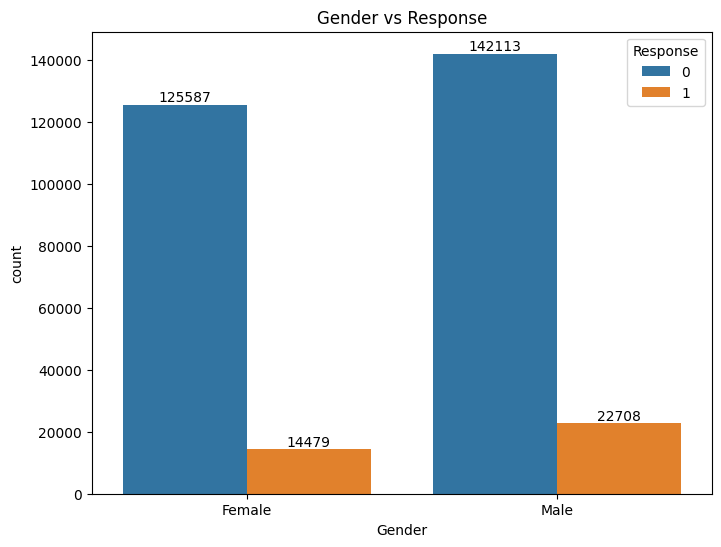

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df_temp['Gender'], hue=df_temp['Response'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Gender vs Response')
plt.show()

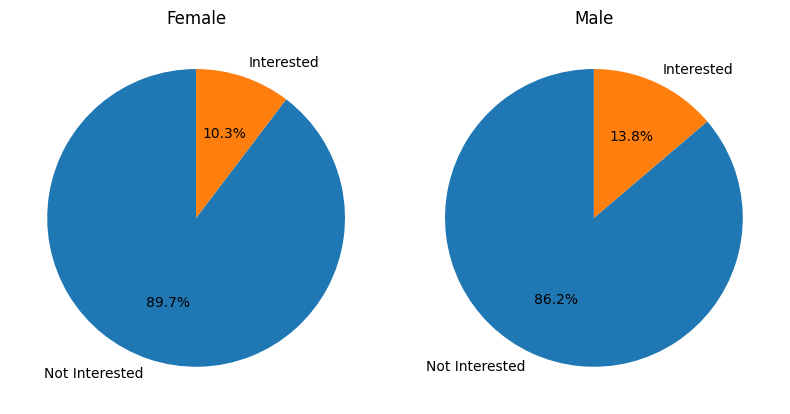

In [ ]:
summary = df_temp.groupby(['Gender', 'Response']).size().reset_index(name='Count')

fig, axes = plt.subplots(1, 2, figsize=(8, 6))

for i, gender in enumerate(['Female', 'Male']):
    data_gender = summary[summary['Gender'] == gender]
    axes[i].pie(
        data_gender['Count'],
        labels=['Not Interested', 'Interested'],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(gender)

plt.tight_layout()
plt.show()

We obtain that the male customer has higher chance of being interested in the vehicle insurance than female customer.

**Recommendation**
1. Create a promo for masculine vehicle in order to attract male customer to subscribe our vehicle insurance.

#### Vehicle Age vs Response

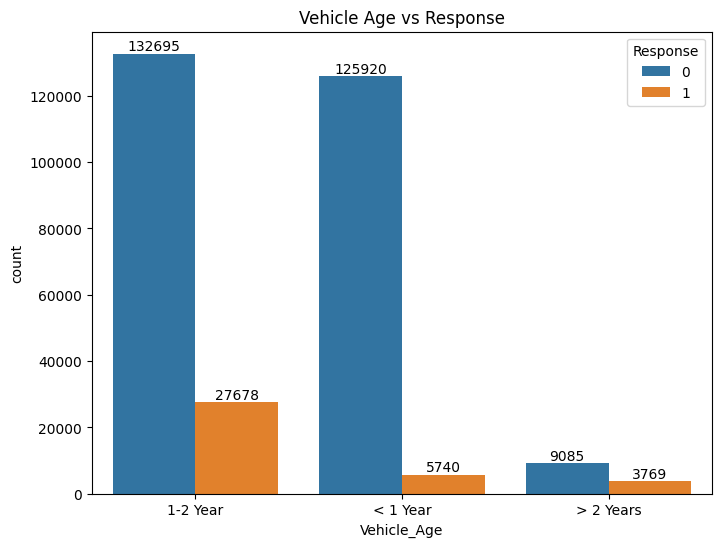

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df_temp['Vehicle_Age'], hue=df_temp['Response'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Vehicle Age vs Response')
plt.show()

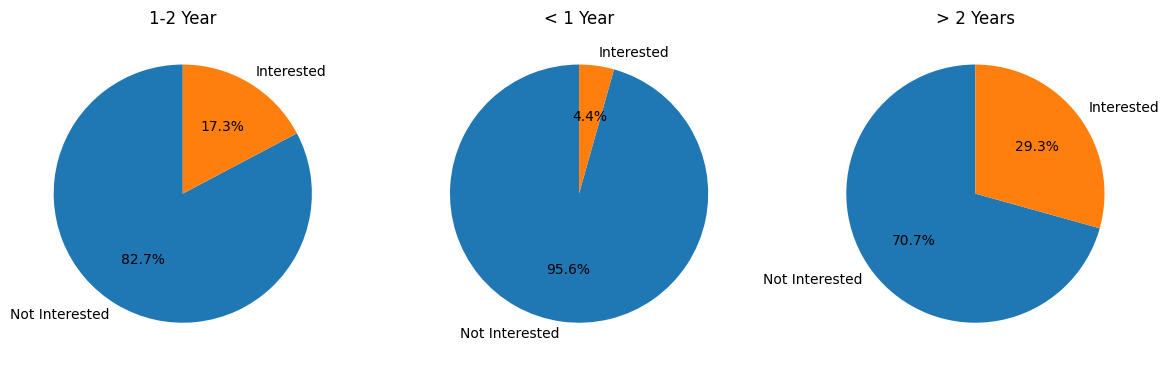

In [ ]:
summary = df_temp.groupby(['Vehicle_Age', 'Response']).size().reset_index(name='Count')

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for i, age in enumerate(list(df_temp['Vehicle_Age'].unique())):
    data_gender = summary[summary['Vehicle_Age'] == age]
    axes[i].pie(
        data_gender['Count'],
        labels=['Not Interested', 'Interested'],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(age)

plt.tight_layout()
plt.show()

* We see that the customers whose vehicle is more than 2 years old have the most probability to be interested in purchasing the vehicle insurance.
* This means that there are many customers that are care with their old or even vintage vehicle

* **Recommendation**
  1. Create a special offer for old or vintage vehicle insurance.


#### Vehicle Damage vs Response

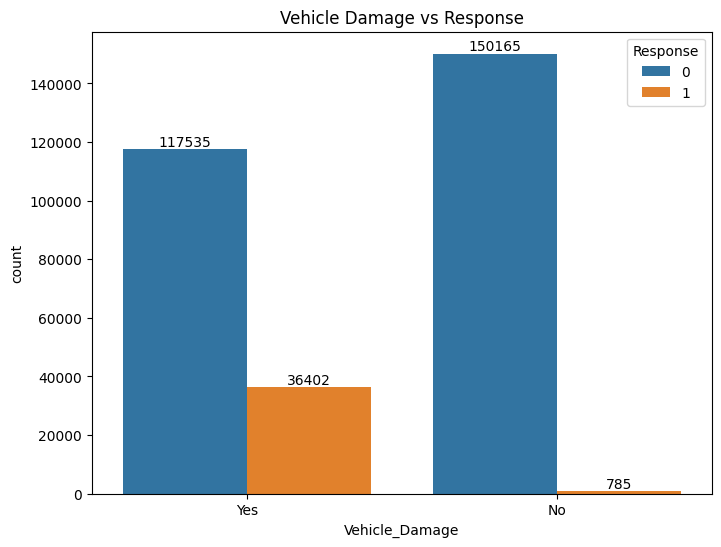

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df_temp['Vehicle_Damage'], hue=df_temp['Response'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Vehicle Damage vs Response')
plt.show()

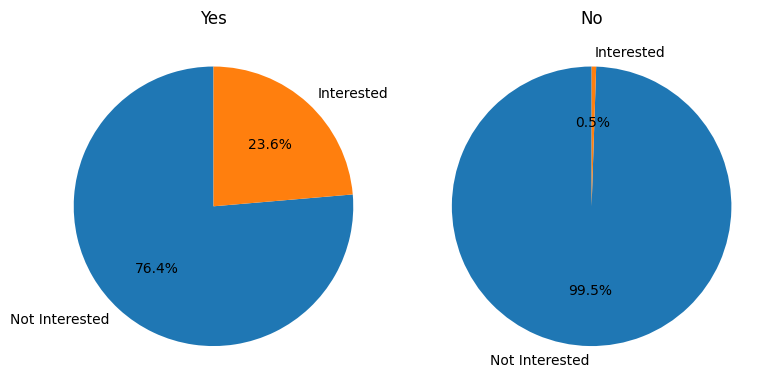

In [ ]:
summary = df_temp.groupby(['Vehicle_Damage', 'Response']).size().reset_index(name='Count')

fig, axes = plt.subplots(1, 2, figsize=(8, 6))

for i, damage in enumerate(list(df_temp['Vehicle_Damage'].unique())):
    data_gender = summary[summary['Vehicle_Damage'] == damage]
    axes[i].pie(
        data_gender['Count'],
        labels=['Not Interested', 'Interested'],
        autopct='%1.1f%%',
        startangle=90
    )
    axes[i].set_title(damage)

plt.tight_layout()
plt.show()

* The majority of customer who are interested in the vehicle insurance are those whose vehicle has been injured previously.
* This may harm the company income since the previously injured vehicle has high chance to be injured again in the future.
* Thus, company should find for customer with brand new vehicle to cover this expense (cross subsidy).

* **Recommendation**
  1. Create a promo for customer with brand new vehicle such as free 3 months subscription

#### Driving License vs Response

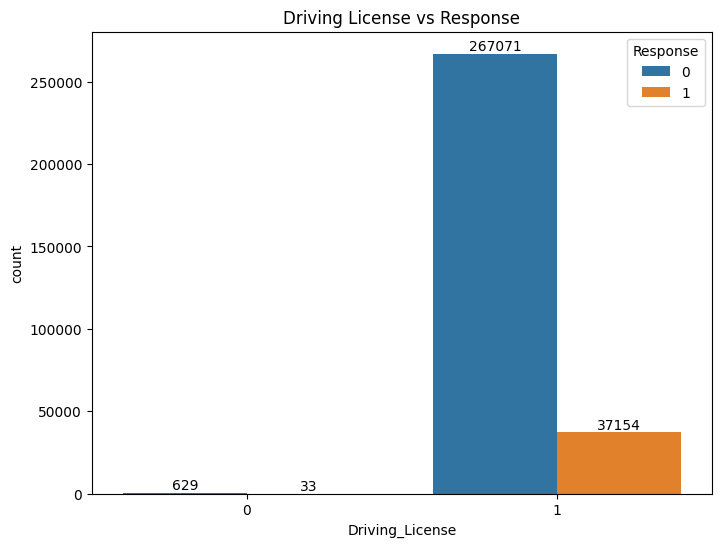

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df_temp['Driving_License'], hue=df_temp['Response'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Driving License vs Response')
plt.show()

We see that there are a lot of customer who has driving lincense in this dataset and they have higher chance to be interested in our vehicle insurance.

#### Previously Insured vs Response

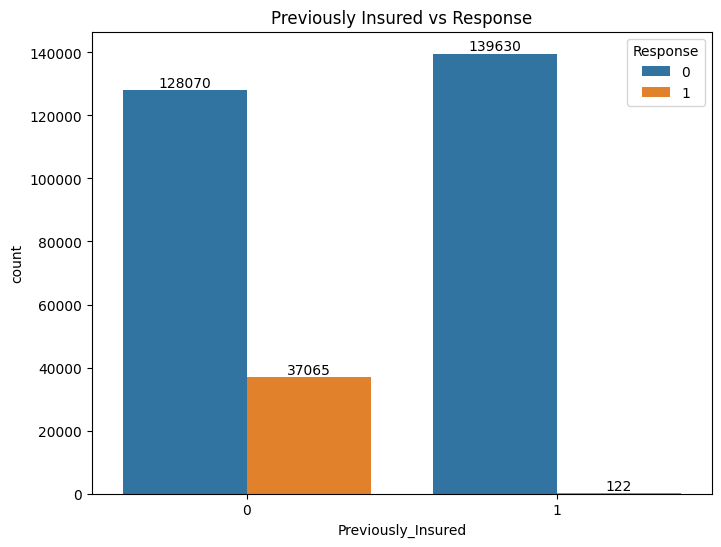

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df_temp['Previously_Insured'], hue=df_temp['Response'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Previously Insured vs Response')
plt.show()

Indeed, the customer who would like to have vehicle insurance is those who do not have the vehicle insurance yet. However, it is surprising that there still exists some people who already have vehicle insurance but still interested in our vehicle insurance.

#### Number of Response

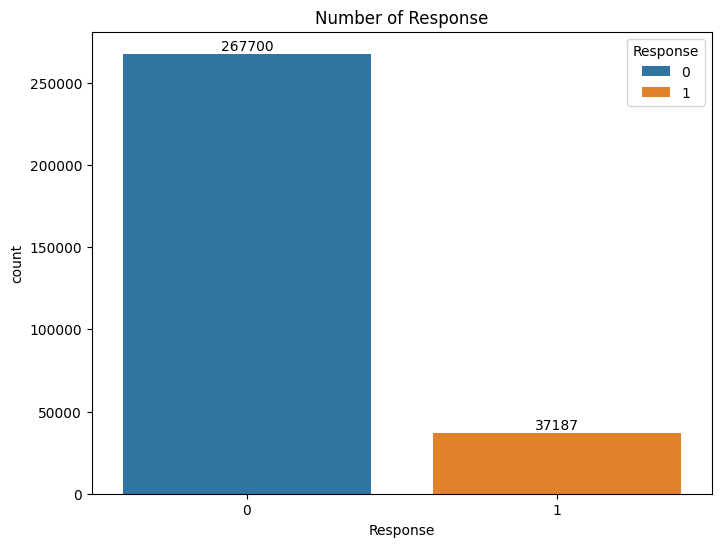

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df_temp['Response'], hue=df_temp['Response'])

# Add annotations
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Number of Response')
plt.show()

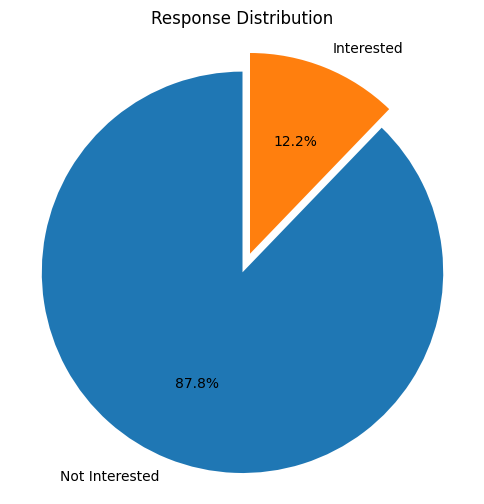

In [ ]:
response_counts = df_temp['Response'].value_counts()

labels = ['Not Interested', 'Interested']
sizes = [response_counts[0], response_counts[1]]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    explode=(0.1, 0)
)
plt.title('Response Distribution')
plt.axis('equal')
plt.show()

* We know that our data is imbalance, that is the number of interested data is far less than the not interested one.
* Thus, since our purpose is classification, then this may be a problem.

* **Recommendation**:
1. Obtain more interested customer data or we can simply do oversampling for the model training.
2. Wisely choose the main metric for measuring the model performance. In this case, f1 score is better since we try to avoid both predicting people who are actually not interested as interested (False Positive) to optimize our marketing and predicting people who are actually interested as not interested to avoid missing getting new customer.

#### Region Code vs Response

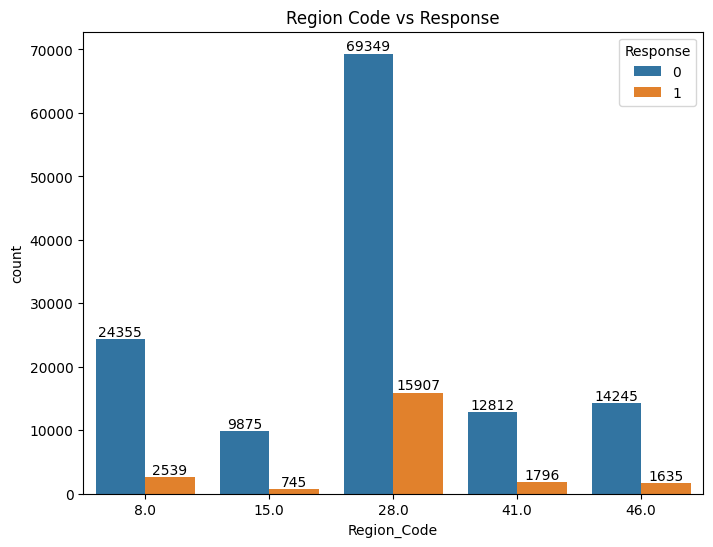

In [ ]:
# we limit the region to only top 5 of them
top_categories = df_temp['Region_Code'].value_counts().head(5).index
filtered_df = df_temp[df_temp['Region_Code'].isin(top_categories)]

plt.figure(figsize=(8, 6))

ax = sns.countplot(x=filtered_df['Region_Code'], hue=filtered_df['Response'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Region Code vs Response')
plt.show()

Based on the top 5 region code, the highest interested rate is in the region number 28. Hence, we need to boost our marketing to this region.

#### Policy Sales Channel vs Response

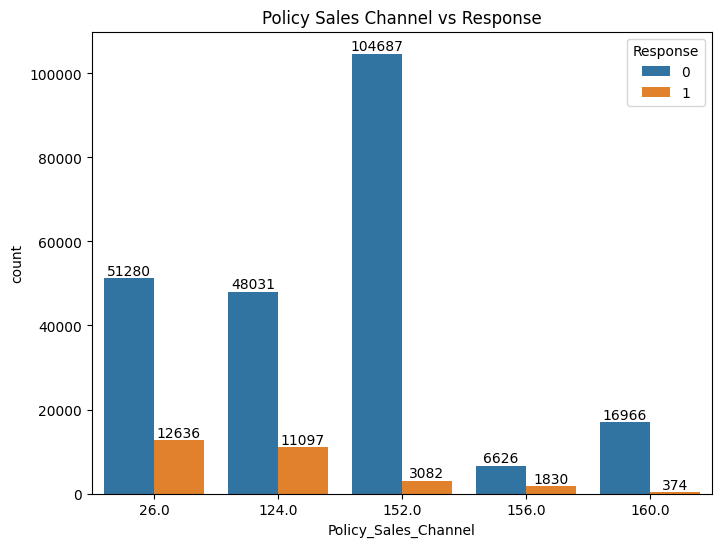

In [ ]:
# we limit the region to only top 5 of them
top_categories = df_temp['Policy_Sales_Channel'].value_counts().head(5).index
filtered_df = df_temp[df_temp['Policy_Sales_Channel'].isin(top_categories)]

plt.figure(figsize=(8, 6))

ax = sns.countplot(x=filtered_df['Policy_Sales_Channel'], hue=filtered_df['Response'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.title('Policy Sales Channel vs Response')
plt.show()

Based on the top 5 policy channel, the customer who is outreached by the policy channel number 26 has the highest possibility to be interested in the vehicle insurance.

### Numerical Data

We will check the numerical column in this dataset.

In [ ]:
numerical = ['Age', 'Annual_Premium', 'Vintage']

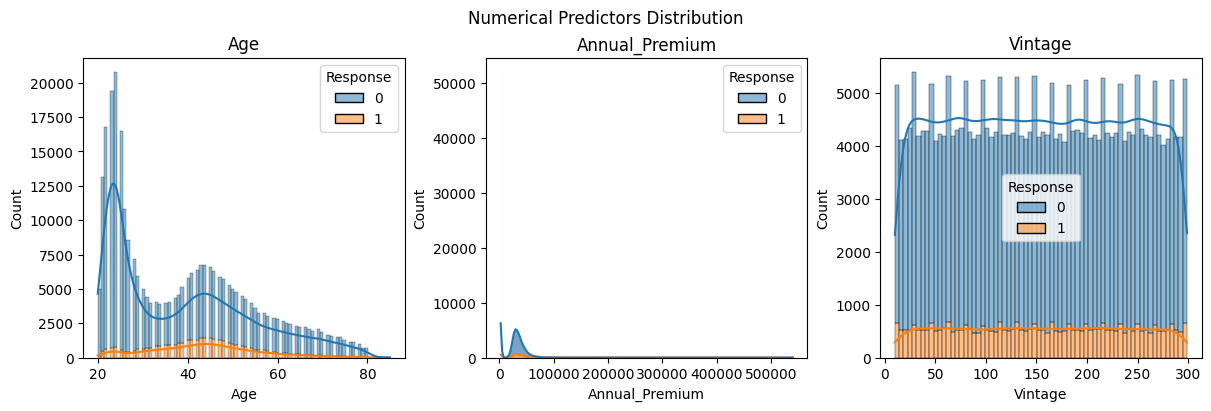

In [ ]:
fig, axes = plt.subplots(1,3, sharex=False, sharey = False, figsize=(12,4), constrained_layout = True)

fig.suptitle('Numerical Predictors Distribution')

col_index = 0

for i in range(3):
  sns.histplot(data=df_temp, x=numerical[col_index], hue='Response', multiple="stack", kde=True, ax = axes[i])
  axes[i].set_title(numerical[col_index])
  col_index += 1

plt.show()

In [ ]:
df_temp['Annual_Premium'].value_counts()

,count
Annual_Premium,
2630.0,51963
69856.0,112
39008.0,38
38287.0,36
43707.0,30
...,...
47207.0,1
60340.0,1
72296.0,1


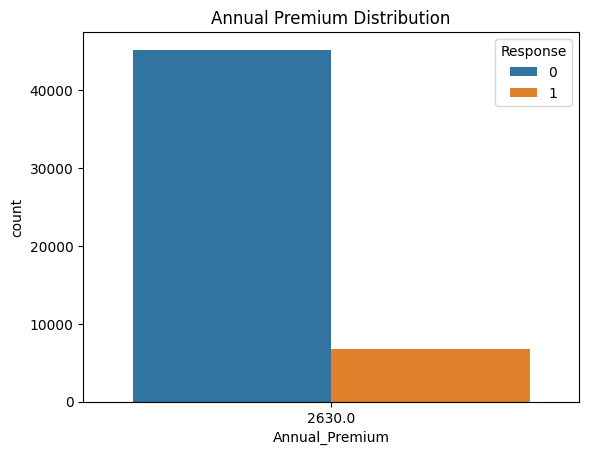

In [ ]:
df_filtered = df_temp[df_temp['Annual_Premium'] == 2630]
sns.countplot(data=df_filtered, x=numerical[1], hue='Response')
plt.title('Annual Premium Distribution')
plt.show()

In [ ]:
df_filtered = df_temp[df_temp['Response'] == 1]
res = df_filtered.groupby('Annual_Premium').size().sort_values(ascending=False)
res

,0
Annual_Premium,
2630.0,6782
69856.0,31
27930.0,9
32643.0,8
28868.0,7
...,...
25900.0,1
38306.0,1
38308.0,1


In [ ]:
res = df_filtered.groupby('Annual_Premium').size().sort_index()
res

,0
Annual_Premium,
2630.0,6782
9816.0,1
11979.0,1
12102.0,1
12756.0,1
...,...
336395.0,2
340439.0,1
472042.0,2


1. **Age**
  * We can see that the customers who are interested in vehicle insurance are mostly those whose age is in range (40,45).
  * On the contrary, even though young adult whose age is in range (20,25) is the majority of the customer, they are mostly not interested in the vehicle insurance.

  * **Recommendations**
    1. We need to educate the young adult more about the advantages of vehicle insurance so that they become interested.
    2. Update the marketing strategy so it fits with the young generation’s interest.

2. **Annual Premium**
  * In the annual premium, there is a peak that is far more than others which is at annual premium = 2630.
  * The number of interested customer in this value is also the highest compare to others.
  * Since this value is the smallest annual premium, it can be the reason why there are a lot of people are interested in the vehicle insurance.
  * However, the interested rate is still low and need marketing improvement to attract more people.

3. **Vintage**
  * The vintage shows relatively constant relations, that is the proportions of interested and not interested in each vintage are relatively the same.
  * This may indicates that vintage do not really affect whether the customer is interested in the vehicle insurance or not.
  * However, this indication requires verification which can be done by using partial dependence plot in the next section.

  * **Recommendations**
    1. Give a discount for loyal customer.

## Feature Engineering

### Outliers

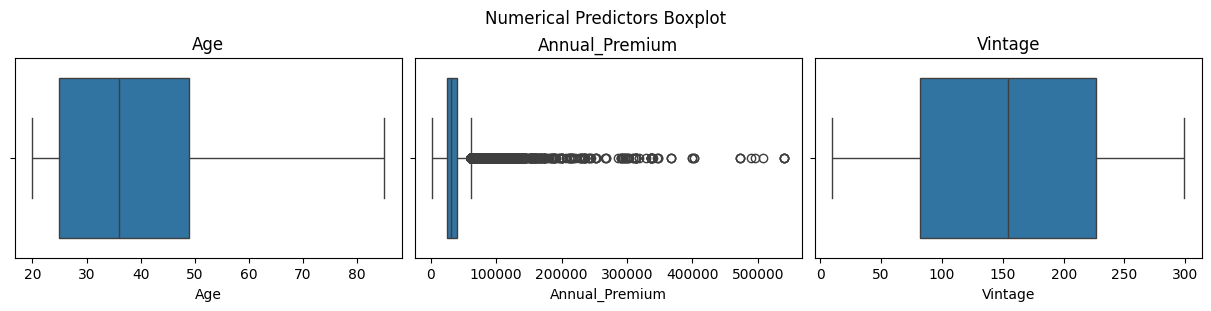

In [ ]:
fig, axes = plt.subplots(1,3, sharex=False, sharey = False, figsize=(12,3), constrained_layout = True)

fig.suptitle('Numerical Predictors Boxplot')

col_index = 0

for i in range(3):
  sns.boxplot(ax = axes[i], x=df_temp[numerical[col_index]])
  axes[i].set_title(numerical[col_index])
  col_index += 1


plt.show()

As we can see that there are a lot of outliers in the Annual_Premium so we can apply log transformation to solve it.

In [ ]:
X_train['Annual_Premium'] = np.log(X_train['Annual_Premium'] + 1)
X_test['Annual_Premium'] = np.log(X_test['Annual_Premium'] + 1)

### Mutlicollinearity

Now we check the correlation matrix to check the multicollinearity of the features.

In [ ]:
df_temp = pd.concat([X_train, y_train], axis=1)
df_temp.corr().style.background_gradient(cmap='coolwarm')

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Gender,1.000000,-0.145359,0.019106,-0.001186,0.082523,-0.160743,-0.093530,0.014376,0.111134,0.002760,-0.052387
Age,-0.145359,1.000000,-0.080803,0.042880,-0.254233,0.765534,0.267424,-0.009304,-0.576785,-0.002283,0.111053
Driving_License,0.019106,-0.080803,1.000000,-0.002273,0.015195,-0.037240,-0.017019,-0.006820,0.044244,-0.001412,0.010280
Region_Code,-0.001186,0.042880,-0.002273,1.000000,-0.023018,0.043748,0.027196,-0.000683,-0.042481,-0.003431,0.011651
Previously_Insured,0.082523,-0.254233,0.015195,-0.023018,1.000000,-0.380911,-0.824565,0.055391,0.220117,0.002610,-0.340417
Vehicle_Age,-0.160743,0.765534,-0.037240,0.043748,-0.380911,1.000000,0.396764,-0.038233,-0.550666,-0.002039,0.221079
Vehicle_Damage,-0.093530,0.267424,-0.017019,0.027196,-0.824565,0.396764,1.000000,-0.040960,-0.224957,-0.002402,0.353340
Annual_Premium,0.014376,-0.009304,-0.006820,-0.000683,0.055391,-0.038233,-0.040960,1.000000,-0.061248,-0.002044,0.002727
Policy_Sales_Channel,0.111134,-0.576785,0.044244,-0.042481,0.220117,-0.550666,-0.224957,-0.061248,1.000000,-0.000127,-0.137533
Vintage,0.002760,-0.002283,-0.001412,-0.003431,0.002610,-0.002039,-0.002402,-0.002044,-0.000127,1.000000,-0.001025


We obtain that the columns Previously Insured and Vehicle Damage has correlation with absolute value greater than 0.8. Thus, we can drop one of both. Because the absolute value of correlation of Vehicle Damage and Response is higher than Previously Insured and Response, we decided to drop Previously Insured.

In [ ]:
X_train = X_train.drop('Previously_Insured', axis=1)
X_test = X_test.drop('Previously_Insured', axis=1)

### Scaling

Because the range in every columns varies, we will do standard scaling over the numeric columns only.

In [ ]:
scaler = StandardScaler()

X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])
X_train.head()

,Gender,Age,Driving_License,Region_Code,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
332803,1,0.010601,1,15.0,1,1,0.856936,55.0,0.869505
116248,0,-0.053875,1,11.0,1,1,0.030188,26.0,-1.497719
255005,0,-1.085502,1,30.0,0,0,0.702983,152.0,0.140209
317474,1,-1.021025,1,41.0,0,0,0.263573,151.0,1.467289
344212,0,1.106704,1,48.0,2,1,-2.127630,154.0,0.008696


### Imbalance Data

In [ ]:
y_train.value_counts()

,count
Response,
0,267700
1,37187


As we know, this data is unbalanced so we can do oversampling by using SMOTE. However, we will do the oversampling using pipeline in the grid search cv to avoid data leakage. We will compare the result with SMOTE and without SMOTE then choose the best one.

## Model Design

In this project, we will compare four models: logistic regression, random forest classifier, decision tree classifier, and xgbclassifier.

### With SMOTE

We will create the model pipeline using SMOTE and its parameter.

In [ ]:
lr_pipeline = Pipeline([
    ('smote', SMOTE()),
    ('model', LogisticRegression(random_state = 42, max_iter=1000))
])

lr_param = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs'],
}

rfc_pipeline = Pipeline([
    ('smote', SMOTE()),
    ('model', RandomForestClassifier(random_state = 42))
])

rfc_param = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

dt_pipeline = Pipeline([
    ('smote', SMOTE()),
    ('model', DecisionTreeClassifier(random_state = 42))
])

dt_param = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'model__max_depth': [None, 10, 20],
    'model__criterion': ['gini', 'entropy']
}

xgb_pipeline = Pipeline([
    ('smote', SMOTE()),
    ('model', XGBClassifier(random_state = 42))
])

xgb_param = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.01, 0.1, 0.3]
}

### Without SMOTE

In [ ]:
lr_param_no_smote = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
}

rfc_param_no_smote = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

dt_param_no_smote = {
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

xgb_param_no_smote = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.01, 0.1, 0.3]
}

### With Undersampling

We will create the model pipeline using undersampling and its parameter.

In [ ]:
lr_pipeline_under = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', LogisticRegression(random_state = 42, max_iter=1000))
])

lr_param_under = {
    'undersample__sampling_strategy': [0.5, 0.75, 1.0],
    'model__C': [0.1, 1, 10],
    'model__solver': ['liblinear', 'lbfgs'],
}

rfc_pipeline_under = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', RandomForestClassifier(random_state = 42))
])

rfc_param_under = {
    'undersample__sampling_strategy': [0.5, 0.75, 1.0],
    'model__n_estimators': [100, 200],
    'model__max_depth': [None, 10, 20]
}

dt_pipeline_under = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', DecisionTreeClassifier(random_state = 42))
])

dt_param_under = {
    'undersample__sampling_strategy': [0.5, 0.75, 1.0],
    'model__max_depth': [None, 10, 20],
    'model__criterion': ['gini', 'entropy']
}

xgb_pipeline_under = Pipeline([
    ('undersample', RandomUnderSampler(random_state=42)),
    ('model', XGBClassifier(random_state = 42))
])

xgb_param_under = {
    'undersample__sampling_strategy': [0.5, 0.75, 1.0],
    'model__n_estimators': [100, 200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.01, 0.1, 0.3]
}

## Model Training

Now we will do model training and hyperparameter tuning using grid search cv. We use the f1 score as parameter since it balances the both scores recall and precision.

### With SMOTE

In [ ]:
lr_gridsearch = GridSearchCV(
    estimator=lr_pipeline,
    param_grid=lr_param,
    scoring='f1',
    cv=5,
    verbose=2
)

lr_gridsearch.fit(X_train, y_train)
lr_best_params = lr_gridsearch.best_params_
lr_best_score = lr_gridsearch.best_score_

print("Best Parameters:", lr_best_params)
print("Best Cross-validation Score:", lr_best_score)

lr_best = lr_gridsearch.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.5; total time=   3.2s
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.5; total time=   3.1s
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.5; total time=   3.1s
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.5; total time=   4.8s
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.5; total time=   3.9s
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.75; total time=   3.4s
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.75; total time=   3.7s
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.75; total time=   4.6s
[CV] END model__C=0.1, model__solver=liblinear, smote__sampling_strategy=0.75; total time=   3.4s
[CV] END model__C=0.1, model__solver=liblinear, smote__samplin

In [ ]:
rfc_gridsearch = GridSearchCV(
    estimator=rfc_pipeline,
    param_grid=rfc_param,
    scoring='f1',
    cv=5,
    verbose=2
)

rfc_gridsearch.fit(X_train, y_train)
rfc_best_params = rfc_gridsearch.best_params_
rfc_best_score = rfc_gridsearch.best_score_

print("Best Parameters:", rfc_best_params)
print("Best Cross-validation Score:", rfc_best_score)

rfc_best = rfc_gridsearch.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.5; total time= 1.5min
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.5; total time= 1.5min
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.5; total time= 1.5min
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.5; total time= 1.5min
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.5; total time= 1.5min
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.75; total time= 2.0min
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.75; total time= 1.9min
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.75; total time= 1.9min
[CV] END model__max_depth=None, model__n_estimators=100, smote__sampling_strategy=0.75; 

In [ ]:
dt_gridsearch = GridSearchCV(
    estimator=dt_pipeline,
    param_grid=dt_param,
    scoring='f1',
    cv=5,
    verbose=2
)

dt_gridsearch.fit(X_train, y_train)
dt_best_params = dt_gridsearch.best_params_
dt_best_score = dt_gridsearch.best_score_

print("Best Parameters:", dt_best_params)
print("Best Cross-validation Score:", dt_best_score)

dt_best = dt_gridsearch.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.5; total time=   5.3s
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.5; total time=   4.0s
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.5; total time=   4.3s
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.5; total time=   6.3s
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.5; total time=   4.4s
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.75; total time=   5.8s
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.75; total time=   5.1s
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.75; total time=   4.9s
[CV] END model__criterion=gini, model__max_depth=None, smote__sampling_strategy=0.75; total time=   6.2s

In [ ]:
xgb_gridsearch = GridSearchCV(
    estimator=xgb_pipeline,
    param_grid=xgb_param,
    scoring='f1',
    cv=5,
    verbose=2
)

xgb_gridsearch.fit(X_train, y_train)
xgb_best_params = xgb_gridsearch.best_params_
xgb_best_score = xgb_gridsearch.best_score_

print("Best Parameters:", xgb_best_params)
print("Best Cross-validation Score:", xgb_best_score)

xgb_best = xgb_gridsearch.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.8s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, smote__sampling_strategy=0.5; total time=   5.3s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.7s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.8s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, smote__sampling_strategy=0.5; total time=   2.7s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, smote__sampling_strategy=0.75; total time=   5.2s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, smote__sampling_strategy=0.75; total time=   3.0s
[CV] END model__learning_r

### Without SMOTE

In [ ]:
model = LogisticRegression(random_state = 42, max_iter=1000)

lr_gridsearch_no_smote = GridSearchCV(
    estimator=model,
    param_grid=lr_param_no_smote,
    scoring='f1',
    cv=5,
    verbose=2
)

lr_gridsearch_no_smote.fit(X_train, y_train)
lr_best_params_no_smote = lr_gridsearch_no_smote.best_params_
lr_best_score_no_smote = lr_gridsearch_no_smote.best_score_

print("Best Parameters:", lr_best_params_no_smote)
print("Best Cross-validation Score:", lr_best_score_no_smote)

lr_best_no_smote = lr_gridsearch_no_smote.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................C=0.1, solver=liblinear; total time=   1.2s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.3s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.3s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.1s
[CV] END ............................C=0.1, solver=liblinear; total time=   1.3s
[CV] END ................................C=0.1, solver=lbfgs; total time=  12.5s
[CV] END ................................C=0.1, solver=lbfgs; total time=   8.6s
[CV] END ................................C=0.1, solver=lbfgs; total time=   5.8s
[CV] END ................................C=0.1, solver=lbfgs; total time=   9.9s
[CV] END ................................C=0.1, solver=lbfgs; total time=   8.8s
[CV] END ..............................C=1, solver=liblinear; total time=   1.8s
[CV] END ..............................C=1, solve

In [ ]:
model = RandomForestClassifier(random_state = 42)

rfc_gridsearch_no_smote = GridSearchCV(
    estimator=model,
    param_grid=rfc_param_no_smote,
    scoring='f1',
    cv=5,
    verbose=2
)

rfc_gridsearch_no_smote.fit(X_train, y_train)
rfc_best_params_no_smote = rfc_gridsearch_no_smote.best_params_
rfc_best_score_no_smote = rfc_gridsearch_no_smote.best_score_

print("Best Parameters:", rfc_best_params_no_smote)
print("Best Cross-validation Score:", rfc_best_score_no_smote)

rfc_best_no_smote = rfc_gridsearch_no_smote.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...................max_depth=None, n_estimators=100; total time=  46.4s
[CV] END ...................max_depth=None, n_estimators=100; total time=  45.6s
[CV] END ...................max_depth=None, n_estimators=100; total time=  45.2s
[CV] END ...................max_depth=None, n_estimators=100; total time=  47.7s
[CV] END ...................max_depth=None, n_estimators=100; total time=  45.7s
[CV] END ...................max_depth=None, n_estimators=200; total time= 1.5min
[CV] END ...................max_depth=None, n_estimators=200; total time= 1.5min
[CV] END ...................max_depth=None, n_estimators=200; total time= 1.6min
[CV] END ...................max_depth=None, n_estimators=200; total time= 1.5min
[CV] END ...................max_depth=None, n_estimators=200; total time= 1.5min
[CV] END .....................max_depth=10, n_estimators=100; total time=  24.0s
[CV] END .....................max_depth=10, n_est

In [ ]:
model = DecisionTreeClassifier(random_state = 42)

dt_gridsearch_no_smote = GridSearchCV(
    estimator=model,
    param_grid=dt_param_no_smote,
    scoring='f1',
    cv=5,
    verbose=2
)

dt_gridsearch_no_smote.fit(X_train, y_train)
dt_best_params_no_smote = dt_gridsearch_no_smote.best_params_
dt_best_score_no_smote = dt_gridsearch_no_smote.best_score_

print("Best Parameters:", dt_best_params_no_smote)
print("Best Cross-validation Score:", dt_best_score_no_smote)

dt_best_no_smote = dt_gridsearch_no_smote.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .....................criterion=gini, max_depth=None; total time=   1.7s
[CV] END .....................criterion=gini, max_depth=None; total time=   1.8s
[CV] END .....................criterion=gini, max_depth=None; total time=   1.7s
[CV] END .....................criterion=gini, max_depth=None; total time=   2.4s
[CV] END .....................criterion=gini, max_depth=None; total time=   2.2s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.9s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.9s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.9s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.9s
[CV] END .......................criterion=gini, max_depth=10; total time=   0.9s
[CV] END .......................criterion=gini, max_depth=20; total time=   1.4s
[CV] END .......................criterion=gini, m

In [ ]:
model = XGBClassifier(random_state = 42)

xgb_gridsearch_no_smote = GridSearchCV(
    estimator=model,
    param_grid=xgb_param_no_smote,
    scoring='f1',
    cv=5,
    verbose=2
)

xgb_gridsearch_no_smote.fit(X_train, y_train)
xgb_best_params_no_smote = xgb_gridsearch_no_smote.best_params_
xgb_best_score_no_smote = xgb_gridsearch_no_smote.best_score_

print("Best Parameters:", xgb_best_params_no_smote)
print("Best Cross-validation Score:", xgb_best_score_no_smote)

xgb_best_no_smote = xgb_gridsearch_no_smote.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   1.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   7.4s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   2.5s
[CV] END ..learning_rate=0.01, max_depth=6, n_estimators=100; total time=   4.6s
[CV] END ..learning_rate=0.01, max_depth=6, n_es

### With Undersampling

In [ ]:
lr_gridsearch_under = GridSearchCV(
    estimator=lr_pipeline_under,
    param_grid=lr_param_under,
    scoring='f1',
    cv=5,
    verbose=2
)

lr_gridsearch_under.fit(X_train, y_train)
lr_best_params_under = lr_gridsearch_under.best_params_
lr_best_score_under = lr_gridsearch_under.best_score_

print("Best Parameters:", lr_best_params_under)
print("Best Cross-validation Score:", lr_best_score_under)

lr_best_under = lr_gridsearch_under.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.5; total time=   0.4s
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.5; total time=   0.5s
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.5; total time=   0.5s
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.5; total time=   0.5s
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.5; total time=   0.5s
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.75; total time=   0.5s
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.75; total time=   0.4s
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.75; total time=   0.5s
[CV] END model__C=0.1, model__solver=liblinear, undersample__sampling_strategy=0.75; total time=   0.4s
[CV] END

In [ ]:
rfc_gridsearch_under = GridSearchCV(
    estimator=rfc_pipeline_under,
    param_grid=rfc_param_under,
    scoring='f1',
    cv=5,
    verbose=2
)

rfc_gridsearch_under.fit(X_train, y_train)
rfc_best_params_under = rfc_gridsearch_under.best_params_
rfc_best_score_under = rfc_gridsearch_under.best_score_

print("Best Parameters:", rfc_best_params_under)
print("Best Cross-validation Score:", rfc_best_score_under)

rfc_best_under = rfc_gridsearch_under.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__max_depth=None, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=  19.3s
[CV] END model__max_depth=None, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=  18.1s
[CV] END model__max_depth=None, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=  19.1s
[CV] END model__max_depth=None, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=  18.8s
[CV] END model__max_depth=None, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=  18.4s
[CV] END model__max_depth=None, model__n_estimators=100, undersample__sampling_strategy=0.75; total time=  15.0s
[CV] END model__max_depth=None, model__n_estimators=100, undersample__sampling_strategy=0.75; total time=  15.1s
[CV] END model__max_depth=None, model__n_estimators=100, undersample__sampling_strategy=0.75; total time=  15.2s
[CV] END model__max_depth=None, model__n

In [ ]:
dt_gridsearch_under = GridSearchCV(
    estimator=dt_pipeline_under,
    param_grid=dt_param_under,
    scoring='f1',
    cv=5,
    verbose=2
)

dt_gridsearch_under.fit(X_train, y_train)
dt_best_params_under = dt_gridsearch_under.best_params_
dt_best_score_under = dt_gridsearch_under.best_score_

print("Best Parameters:", dt_best_params_under)
print("Best Cross-validation Score:", dt_best_score_under)

dt_best_under = dt_gridsearch_under.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END model__criterion=gini, model__max_depth=None, undersample__sampling_strategy=0.5; total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=None, undersample__sampling_strategy=0.5; total time=   0.8s
[CV] END model__criterion=gini, model__max_depth=None, undersample__sampling_strategy=0.5; total time=   0.8s
[CV] END model__criterion=gini, model__max_depth=None, undersample__sampling_strategy=0.5; total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=None, undersample__sampling_strategy=0.5; total time=   1.1s
[CV] END model__criterion=gini, model__max_depth=None, undersample__sampling_strategy=0.75; total time=   0.9s
[CV] END model__criterion=gini, model__max_depth=None, undersample__sampling_strategy=0.75; total time=   0.7s
[CV] END model__criterion=gini, model__max_depth=None, undersample__sampling_strategy=0.75; total time=   0.6s
[CV] END model__criterion=gini, model__max_depth=None, u

In [ ]:
xgb_gridsearch_under = GridSearchCV(
    estimator=xgb_pipeline_under,
    param_grid=xgb_param_under,
    scoring='f1',
    cv=5,
    verbose=2
)

xgb_gridsearch_under.fit(X_train, y_train)
xgb_best_params_under = xgb_gridsearch_under.best_params_
xgb_best_score_under = xgb_gridsearch_under.best_score_

print("Best Parameters:", xgb_best_params_under)
print("Best Cross-validation Score:", xgb_best_score_under)

xgb_best_under = xgb_gridsearch_under.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=   0.7s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=   0.7s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=   0.6s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=   3.3s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, undersample__sampling_strategy=0.5; total time=   0.6s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, undersample__sampling_strategy=0.75; total time=   0.5s
[CV] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, undersample__sampling_strategy=0.75; tot

## Model Evaluation

Finally, we will compare all scores of three models in both train and test dataset.

In [ ]:
best_model = [lr_best, rfc_best, dt_best, xgb_best, lr_best_no_smote,
              rfc_best_no_smote, dt_best_no_smote, xgb_best_no_smote, lr_best_under,
              rfc_best_under, dt_best_under, xgb_best_under]
names = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost',
         'Logistic Regression (No SMOTE)', 'Random Forest (No SMOTE)',
         'Decision Tree (No SMOTE)', 'XGBoost (No SMOTE)',
         'Logistic Regression (Undersampling)', 'Random Forest (Undersampling)',
         'Decision Tree (Undersampling)', 'XGBoost (Undersampling)']
train_score = []
test_score = []
y_pred_test = []

best_score = 0

for i, mod in enumerate(best_model):
  y_pred = mod.predict(X_train)
  train_score.append(recall_score(y_train, y_pred))

  y_pred = mod.predict(X_test)
  score = recall_score(y_test, y_pred)
  test_score.append(score)
  y_pred_test.append(y_pred)

  if score > best_score:
    best_score = score
    best_model_name = names[i]
    best_model_param = mod

result = pd.DataFrame({'Model':names,
                       'Train Score':train_score,
                       'Test Score':test_score})

result

,Model,Train Score,Test Score
0,Logistic Regression,0.695754,0.700305
1,Random Forest,0.755076,0.747139
2,Decision Tree,0.744292,0.745353
3,XGBoost,0.748568,0.748399
4,Logistic Regression (No SMOTE),0.001990,0.002100
5,Random Forest (No SMOTE),0.998736,0.108999
6,Decision Tree (No SMOTE),0.998897,0.298120
7,XGBoost (No SMOTE),0.081346,0.040323
8,Logistic Regression (Undersampling),0.697878,0.706290
9,Random Forest (Undersampling),0.791863,0.779166


We attained that all of the models with no sampling are either overfit nor underfit while the models with SMOTE or Undersampling are best fit. Among all of this models, the best model for this study case is the Random Forest with undersampling because both f1 scores in the train and test dataset are the highest.

To interpret more about this result, we can visualize it using the confusion matrix as follows.

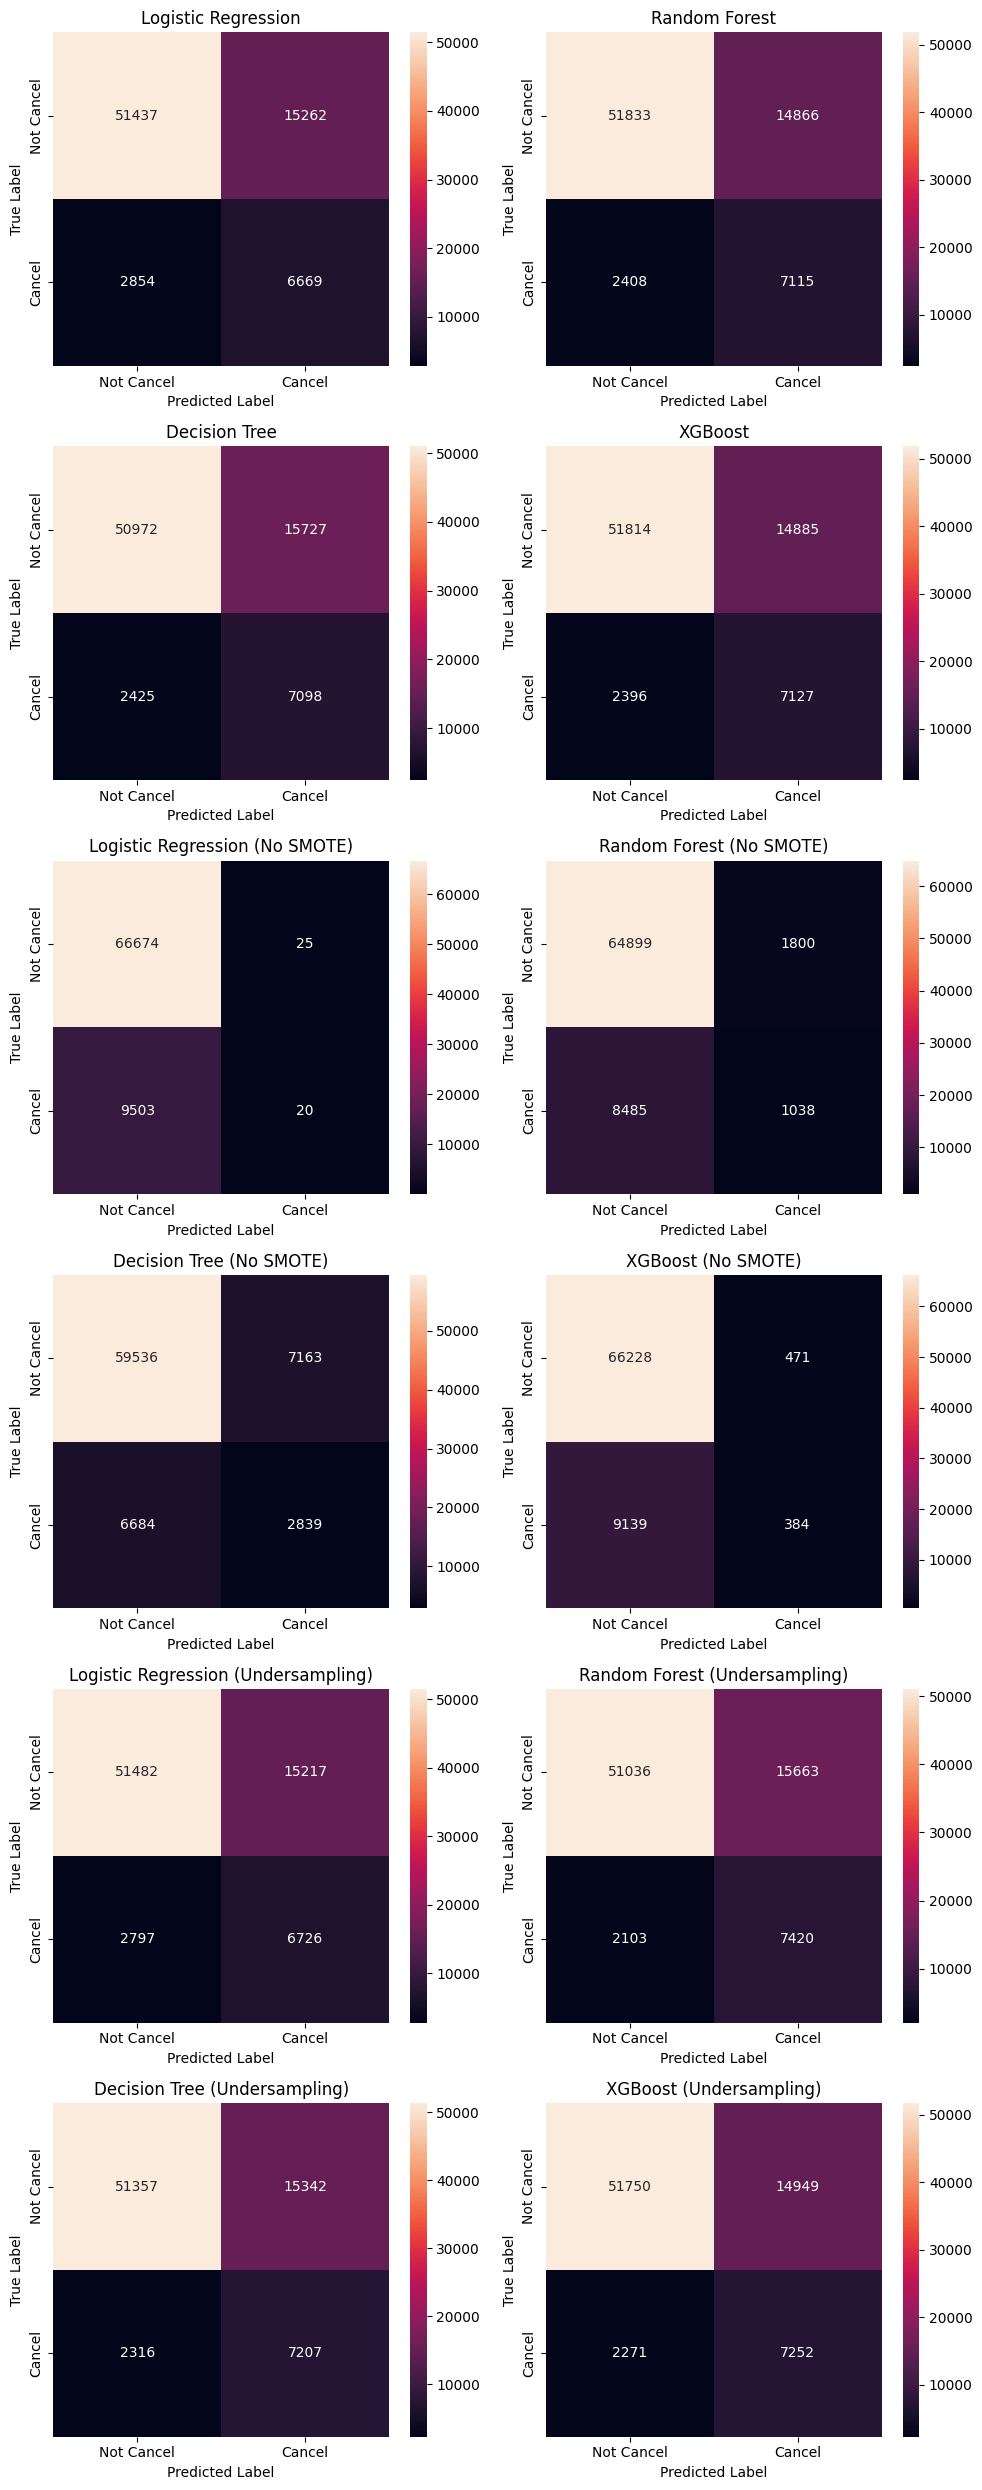

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(10, 25))

id = 0
for i in range(6):
  for j in range(2):
    cm = confusion_matrix(y_test, y_pred_test[id])
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=['Not Cancel', 'Cancel'],
                yticklabels=['Not Cancel', 'Cancel'],
                ax=axes[i,j])
    axes[i,j].set_title(names[id])
    axes[i,j].set_xlabel('Predicted Label')
    axes[i,j].set_ylabel('True Label')
    id+=1

plt.tight_layout()
plt.show()

All of the models varied in the prediction result with the models without any sampling have the smallest number of true positive prediction. All of the models with undersampling have higher number of true positive compare to the models with SMOTE. This is probably because the data is very unbalanced with the cancel data is only 12.2% of the data.

**Recommendation**

To upgrade the model's performance, we can do the following.
1. Experiment with more hyper parameter during the hyper parameter tuning stage using grid search cv.
2. Create more new features from the existing features.
3. We can use other encoding techniques, such as one hot encoding. Furthermore, we can also experiment with other scaling techniques such as robust scaler.



## Result Analysis

Lastly, we will analyse the features and their influence to the random forest model's prediction by using feature importance.

In [ ]:
data_explainer = dx.Explainer(best_model_param, X_train, y_train, label = best_model_name + " Interpretation")
data_explainer.model_parts().plot()

Preparation of a new explainer is initiated

  -> data              : 304887 rows 9 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 304887 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest (Undersampling) Interpretation
  -> predict function  : <function yhat_proba_default at 0x7fae97b65240> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.00122, mean = 0.263, max = 0.777
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.761, mean = -0.141, max = 0.991
  -> model_info        : package imblearn

A new explainer has been created!


Based on the visualization above, we obtain that the top three most influential features for model's prediction are vehicle_damage, age, and vehicle_age. To know more about the direction of this factore we can visualize it using partial dependence plot.

In [ ]:
data_explainer.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/9 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  22%|██▏       | 2/9 [00:00<00:01,  4.48it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.   0.01 0.02 ... 0.98 0.99 1.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:  44%|████▍     | 4/9 [00:00<00:01,  4.33it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: Futu

1. Vehicle Damage
  * The dependence plot has a positive influence, indicating that the more vehicle damage, the higher the chance of the customer being interested.
  * Recommendation:
    * Attract more customers with previously damaged vehicles by giving subscription discounts for previously damaged vehicles.

2. Age
  * The graphic shows a decreasing trend, which means that the older the customer is, the less likely the customer is interested.
  * Recommendation:
    * Adjust the marketing technique so that it is suitable for the young generation's latest trends.

3. Vehicle Age
  * After reaching a certain vehicle age and beyond, the probability of the customer being interested in the vehicle insurance is increasing.
  * Recommendation:
    * Give special offers/promotions for vintage vehicles to attract more people with this kind of vehicle.

